In [6]:
import pandas as pd
FILES = ['ElonTweets(Sentiment)_10-28-22.csv', 'ElonTweets(Sentiment).csv', 'ElonTweets(Sentiment)_11-9-22.csv']
df = pd.concat([pd.read_csv(f) for f in FILES], ignore_index = True)
assert (df.groupby('Tweet Id').agg({'sentiment' : set}).sentiment.apply(len) == 1).all()
df = df.drop_duplicates('Tweet Id')

df = df.drop(columns = [col for col in df.columns if 'Unnamed' in col])
def parse_sentiment(value):
    sentiment, proba = value[1:-1].split(',')
    return pd.Series([sentiment[1:-1], float(proba)])
df[['sentiment','sentiment_proba']] =df.sentiment.apply(parse_sentiment)
assert ((df.location == "Twitter HQ")| (df.location.isna())).all()

sentiment_value_dict = {
    'neutral' : 0,
    'positive' : 1,
    'negative' : -1,
}
def sentiment_to_value(sentiment):
    return sentiment_value_dict[sentiment]
assert all( value in sentiment_value_dict.keys() for value in df.sentiment.unique())
df['sentiment_value'] = df.sentiment.apply(sentiment_to_value)
df['Date'] = pd.to_datetime(df['Date'])
df['number_of_tweets'] = 1

def mention_count(mention_list):
    if mention_list == '_':
        return 0
    else:
        return 1 + mention_list.count(',')
df['number_of_mentions'] = df['mentions'].apply(mention_count)
TWEET_METRICS = ['reply count', 'retweet count', 'like count']

### Evolution of stats over time

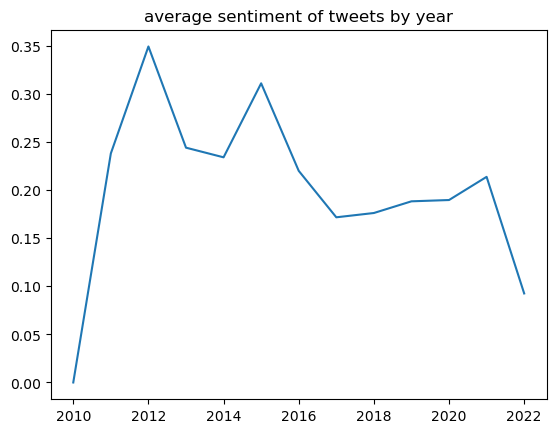

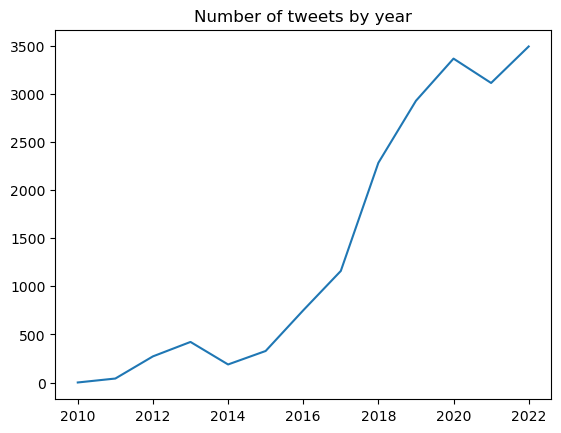

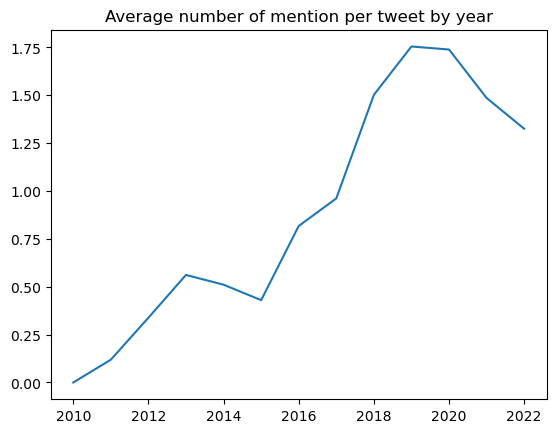

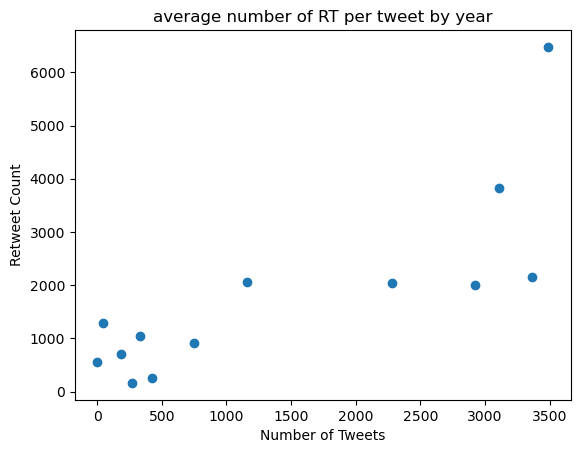

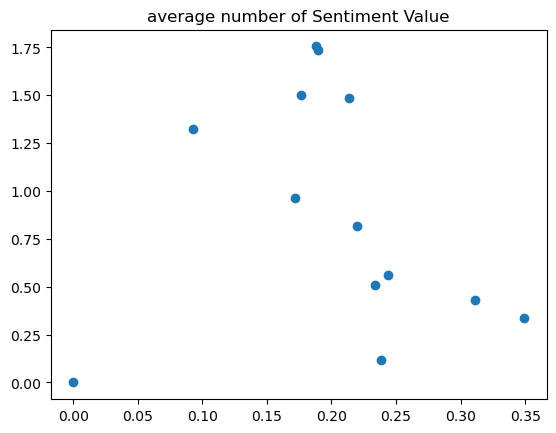

In [33]:
from matplotlib import pyplot as plt

tweets_per_year = df.groupby(df['Date'].dt.year).agg({'sentiment_value' : 'mean', 'number_of_tweets' : 'sum', 'reply count' : 'mean', 'retweet count' : 'mean', 'like count' : 'mean', 'number_of_mentions' : 'mean'})

plt.plot(tweets_per_year.index, tweets_per_year['sentiment_value'])
plt.title("average sentiment of tweets by year")
plt.show()
plt.plot(tweets_per_year.index, tweets_per_year['number_of_tweets'])
plt.title("Number of tweets by year")
plt.show()
plt.plot(tweets_per_year.index, tweets_per_year['number_of_mentions'])
plt.title("Average number of mention per tweet by year")
plt.show()
##plt.scatter(tweets_per_year, tweets_per_year['like count'])
##plt.plot(tweets_per_year.index, tweets_per_year['like count'])
##plt.title("average number of likes per tweet by year")
##plt.show()
plt.scatter(x=tweets_per_year['number_of_tweets'], y =tweets_per_year['retweet count'])
##plt.plot(tweets_per_year['number_of_tweets'], tweets_per_year['retweet count'])
plt.title("average number of RT per tweet by year")
plt.xlabel('Number of Tweets')
plt.ylabel('Retweet Count')
plt.show()
plt.scatter(tweets_per_year['sentiment_value'], tweets_per_year['number_of_mentions'])
##plt.plot(tweets_per_year.index, tweets_per_year['number_of_mentions'])
plt.title("average number of Sentiment Value")
plt.show()


In [36]:
tweets_per_year

,sentiment_value,number_of_tweets,reply count,retweet count,like count,number_of_mentions
Date,,,,,,
2010,0.000000,1,988.000000,558.000000,6023.000000,0.000000
2011,0.238095,42,108.047619,1295.285714,6932.690476,0.119048
2012,0.349265,272,41.250000,164.466912,615.496324,0.338235
2013,0.244076,422,66.009479,260.969194,198.971564,0.561611
2014,0.234043,188,122.936170,700.893617,909.159574,0.510638
2015,0.310976,328,168.484756,1050.009146,1744.451220,0.429878
2016,0.220000,750,152.596000,923.906667,2886.604000,0.817333
2017,0.171700,1159,375.266609,2068.394305,9707.867127,0.961173
2018,0.176161,2282,489.531113,2038.971954,15546.510955,1.502191


<AxesSubplot:ylabel='retweet count'>

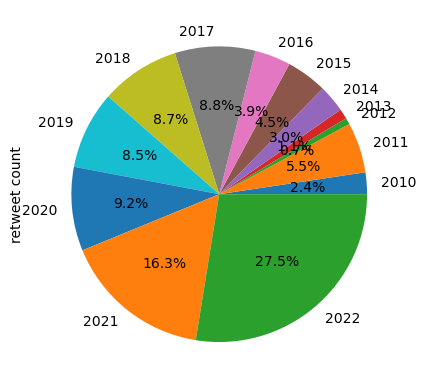

In [46]:
tweets_per_year['retweet count'].plot(kind='pie', autopct='%1.1f%%')

In [15]:
tweets_per_year

,sentiment_value,number_of_tweets,reply count,retweet count,like count,number_of_mentions
Date,,,,,,
2010,0.000000,1,988.000000,558.000000,6023.000000,0.000000
2011,0.238095,42,108.047619,1295.285714,6932.690476,0.119048
2012,0.349265,272,41.250000,164.466912,615.496324,0.338235
2013,0.244076,422,66.009479,260.969194,198.971564,0.561611
2014,0.234043,188,122.936170,700.893617,909.159574,0.510638
2015,0.310976,328,168.484756,1050.009146,1744.451220,0.429878
2016,0.220000,750,152.596000,923.906667,2886.604000,0.817333
2017,0.171700,1159,375.266609,2068.394305,9707.867127,0.961173
2018,0.176161,2282,489.531113,2038.971954,15546.510955,1.502191


### Number of tweets per week, per year

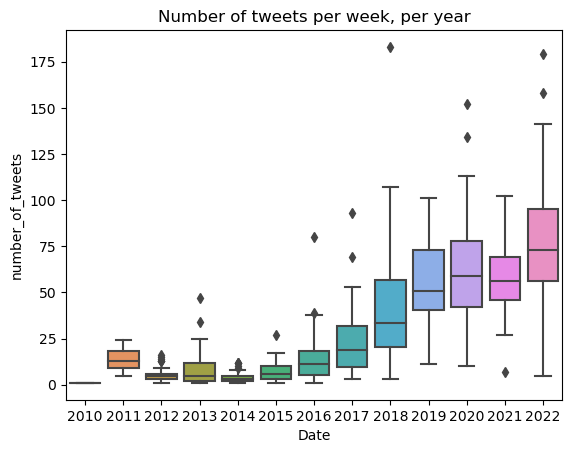

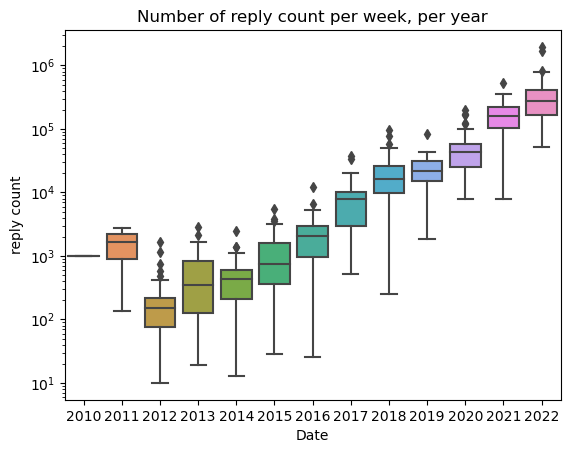

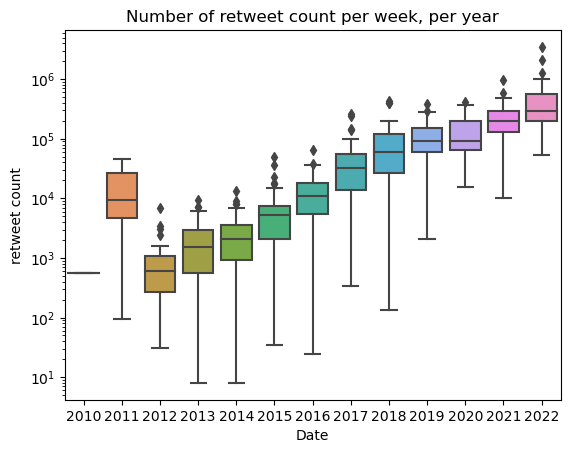

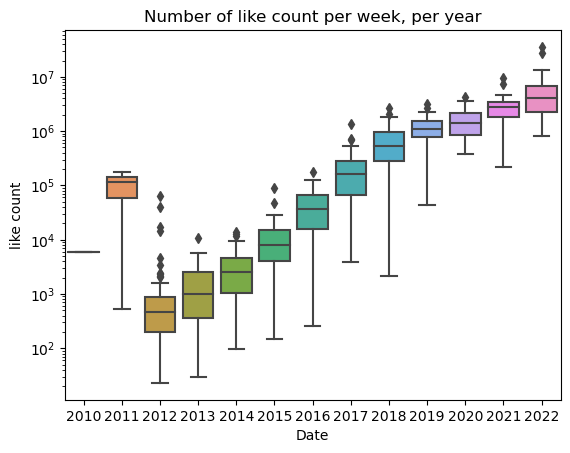

In [8]:
import seaborn as sns

df_by_week = df.groupby([df.Date.dt.year, df.Date.dt.isocalendar().week]).agg({col : 'sum' for col in[ 'number_of_tweets'] + TWEET_METRICS}).reset_index()
sns.boxplot(data = df_by_week, x = "Date", y = "number_of_tweets")
plt.title("Number of tweets per week, per year")
plt.show()

for col in TWEET_METRICS:
    sns.boxplot(data = df_by_week, x = "Date", y = col)
    plt.yscale('log')
    plt.title(f"Number of {col} per week, per year")
    plt.show()

### Sentiment distribution

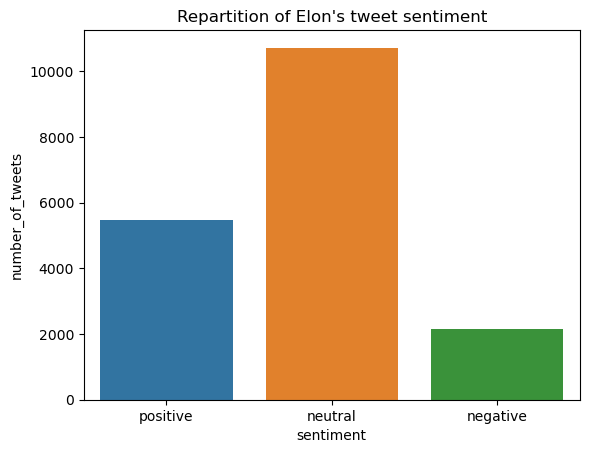

In [9]:
sns.barplot(data = df, x = 'sentiment', y = 'number_of_tweets', estimator=sum)
plt.title("Repartition of Elon's tweet sentiment")
plt.show()

### Audience reaction by tweet sentiment

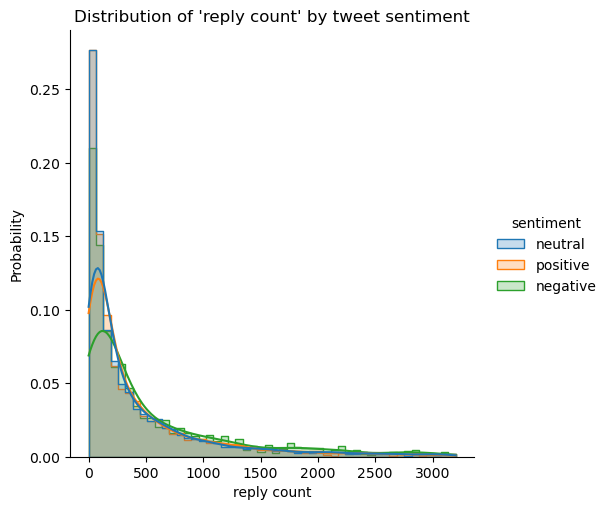

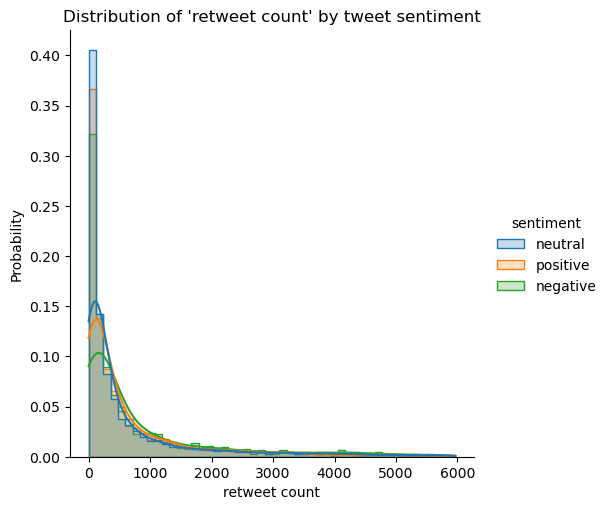

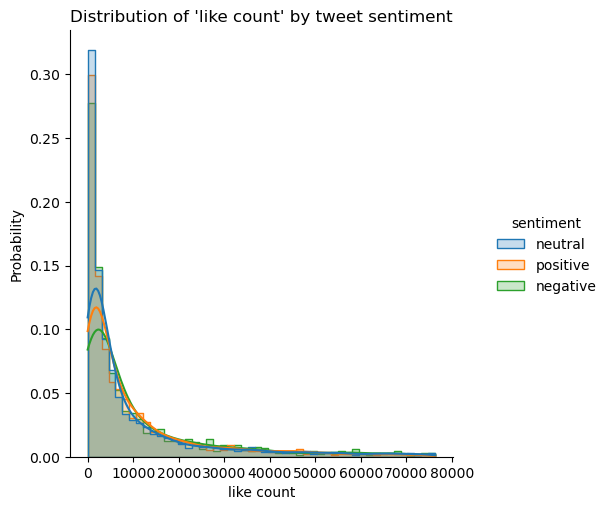

In [10]:
for col_to_show in TWEET_METRICS:
    QUANTILE_TO_KEEP = 0.90
    max_for_graph = df[col_to_show].quantile(QUANTILE_TO_KEEP)
    df_for_graph = df[df[col_to_show] < max_for_graph].copy()
    sns.displot(data = df_for_graph, x = col_to_show, hue = 'sentiment', stat = 'probability', common_norm = False,   element = "step", bins = 50, kde = True)
    plt.title(f"Distribution of '{col_to_show}' by tweet sentiment")
    plt.show()
    # We want to show what kind of tweet triggers the most reaction.
    # There doesn't seem to be a significative difference

In [11]:
# We can confirm what we saw with a correlation : 
df[['sentiment_value', 'reply count', 'retweet count', 'like count']].corr()
# sentiment_value doesn't seem to really affect relpy/RT/like count but those value seem to be very correlated.

,sentiment_value,reply count,retweet count,like count
sentiment_value,1.000000,-0.046220,-0.042953,-0.032592
reply count,-0.046220,1.000000,0.730390,0.811894
retweet count,-0.042953,0.730390,1.000000,0.919679
like count,-0.032592,0.811894,0.919679,1.000000


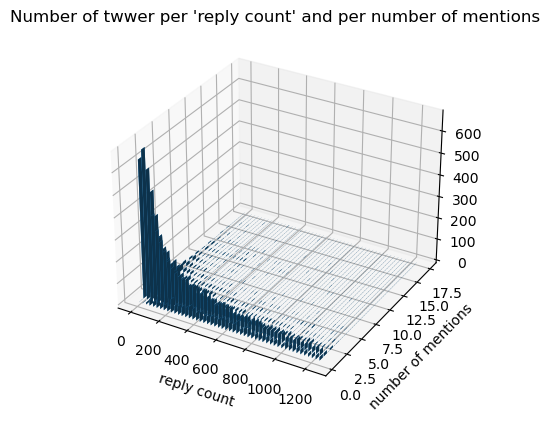

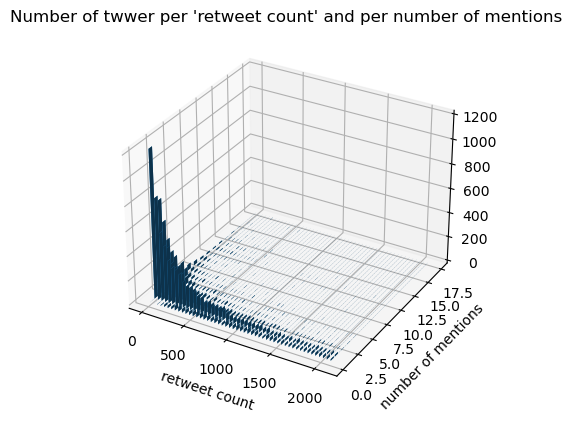

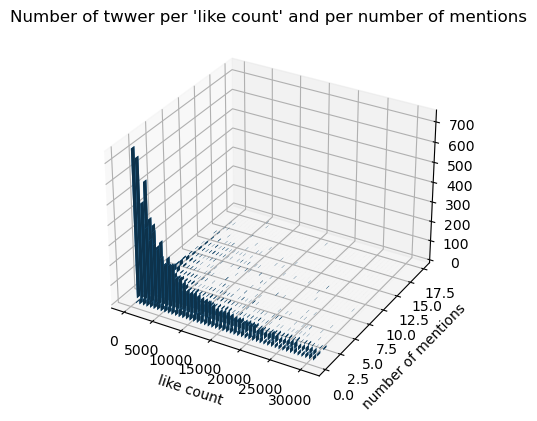

In [12]:
import numpy as np
MIN_YEAR = 2015
# we filter on later year to avoid the bias of earlier years having less mentions and less visibility
for col_to_show in ['reply count', 'retweet count', 'like count']:
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    QUANTILE_TO_KEEP = 0.80
    df_filtered = df[df.Date.dt.year > MIN_YEAR]
    max_for_graph = df_filtered[col_to_show].quantile(QUANTILE_TO_KEEP)
    df_for_graph = df_filtered[(df_filtered[col_to_show] < max_for_graph) ].copy()

    hist, xedges, yedges = np.histogram2d(df_for_graph[col_to_show], df_for_graph['number_of_mentions'], bins=50, range=[[0, max_for_graph], [0, df_for_graph['number_of_mentions'].max()]])
    # Construct arrays for the anchor positions of the 16 bars.
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
    plt.title(f"Number of twwer per '{col_to_show}' and per number of mentions")
    plt.xlabel(col_to_show)
    plt.ylabel('number of mentions')
    plt.show()
# a high number of mentions do not seem to be the norm nor increase the amount of engagement.

In [13]:
# We can check our result with some correlations :
df[['number_of_mentions', 'reply count', 'retweet count', 'like count']].corr()

,number_of_mentions,reply count,retweet count,like count
number_of_mentions,1.000000,-0.185155,-0.183505,-0.215007
reply count,-0.185155,1.000000,0.730390,0.811894
retweet count,-0.183505,0.730390,1.000000,0.919679
like count,-0.215007,0.811894,0.919679,1.000000
